## Week 7. Convolutional Neural Networks and Clustering (Part I) 

In this session, we conclude on neural networks (You will finally get use convolutional neural networks for image classification), and we will start working with unsupervised learning models, and in particular clustering. 

## Supervised Learning (contd)

### Part I: Convolutional Neural Networks

### I.1. Playing with convolutions..

The idea behing convolutional neural nets is to extract high level features from the images in order to become better and better at discriminating them. When we are given two images, one could compare those images pixel-wise, but that could give us a relatively large number even if the images represent the same object. On top of comparing the pixels, one approach could be to average the pixels from, small, local neighborhoods and to compare those averages across the images. Consider the image shown below. 


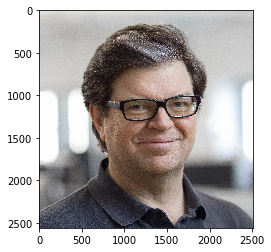

In [49]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

img = plt.imread('YannLeCun.jpg')
plt.figure()
plt.imshow(img)
plt.show()

__1a. Turn this image into a black and white image by using the lines below__ 

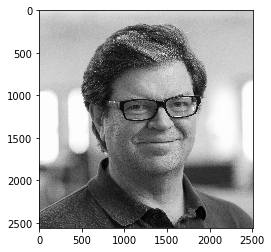

In [4]:
from skimage import color
from skimage import io

img = color.rgb2gray(io.imread('YannLeCun.jpg'))
plt.figure()
plt.imshow(img,cmap='gray')
plt.show()

__1b__ To understand how filters and convolutions can help us extract information from the image, we will use the following filters and compute their convolution with the image above. Use the function 'ndimage.filters.convolve' to compute the convolution of those filters with the image of Yann LeCun. 




In [ ]:
from scipy import ndimage


Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
# put your code here


In [ ]:
plt.figure()
plt.imshow(Iy,cmap='gray')
plt.show()


__1c In your opinion, what do those convolutions return ?__
If it is not yet clear, repeat the steps with the image below

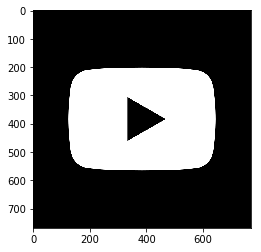

In [12]:
from skimage import color
from skimage import io

img = color.rgb2gray(io.imread('youTubeImage.png'))
plt.figure()
plt.imshow(img,cmap='gray')
plt.show()

And with the square image below

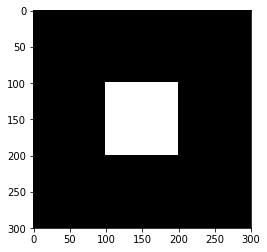

In [15]:
from skimage import color
from skimage import io

img = color.rgb2gray(io.imread('whiteSquare.png'))
plt.figure()
plt.imshow(img,cmap='gray')
plt.show()

From the exercises above, you see that one can learn specific features from the images by taking their convolutions with appropriate filters. In this case, we had predefined our filters. Convolutional neural networks generalize this idea by learning the most appropriate filters for a particular classification task. If we want to discriminate between a dog and cat for example, the network will try to learn the best filters such that the convolution of the filter with the dog image is as far as possible from the convolution of the filter with the cat image. In the next exercise, we will use this idea to discriminate between shapes. 

### I.4 The structure of a convolutional neural network

Convolutional neural network are essentially made up of 3 blocks.

- __Convolutional layers__. Those layers take as input the images from the previous layers and return the convolution of these images 

- __Pooling layers__. Pooling layers are often added to convolutional neural networks to reduce the representation and to improve the robustness. The Pooling step is usually defined by 2 parameters: the filter size and the stride (which indicates by how many pixels you want to move the filter before applying it to return the next value.). 

- __Fully connected layers__ Those are just regular layers similar to the one found in traditional neural networks. 

The two figures below respectively illustrate the convolution and the MaxPool steps. 

<img src="convolution1.gif" alt="Drawing" style="width: 500px;"/>


<img src="Maxpool.png" alt="Drawing" style="width: 500px;"/>


### I.3. Recognizing shapes. 

Log on to Kaggle and download the 'four-shapes' dataset. Then modify the lines below to load a few images from any two shapes.

In [33]:
# put the code here

import numpy as np
from PIL import Image
import imageio
import glob
import cv2

# checking the size of the images
im = cv2.imread('/Users/acosse/Desktop/Teaching/MachineLearning2019Fall/ConvNets/four-shapes/shapes/circle/0.png')
# converting to RGB
r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
sz = np.shape(gray)
num_circles = 100
circle_images = np.zeros((num_circles,np.prod(sz)))


(200, 200)
(100, 40000)


In [36]:
# loading a few circles

for filename in glob.glob('/Users/acosse/Desktop/Teaching/MachineLearning2019Fall/ConvNets/four-shapes/shapes/circle/*.png'): #assuming gif
    
    if iter_circles<num_circles:
        
        im = cv2.imread(filename)
        r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
        gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
        # flatten and then store the images in the numpy array
        im_tmp = gray.flatten()
        circle_images[iter_circles,:] = im_tmp     
        iter_circles+=1

    else:
        
        break
        

In [ ]:
# modify the code above to load any other shape of your choice


__Exercise I.3.1__

Using a combination of Pooling, Convolutions and fully connected layers, togehter with the log loss function, try to design a convolutional neural network in Keras that can discriminate between your two shapes. A good idea could be to stack one or two 'CONV => ACTIVATION => POOL' layers and then conclude with a fully connected layer and the ouptut layer. (Check for example the LeNet architecture below)

<img src="LeNetArch.jpg" alt="Drawing" style="width: 600px;"/>


In [57]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten


# put your code here 

# Unsupervised Learning

### Part II (Clustering).
### II.1. Market Basket analysis and the A priori algorithm

One of the most basic clustering algorithm, market basket works by grouping together items that are frequently purchased together. Download the following two grocery datasets from 

- The [github of Jose Zuniga](https://github.com/jzuniga123/SPS/blob/master/DATA%20624/GroceryDataSet.csv). 
- [Kaggle's Basketballoptimisation page](https://www.kaggle.com/shwetabh123/basketballoptimisation)

<img src="superMarketImage.jpg" alt="Drawing" style="width: 300px;"/>

image credit:  [www.hybridexcellence.com](http://www.hybridexcellence.com/super-market-rack.aspx) 

Association rule analysis is powerful approach that is used to mine commercial databases. The idea is to find product that are often purchased simultaneously. If the customers are represented by a vector $\boldsymbol X\in \mathbb{N}^D$ (for ex. dummy encoding), where $D$ is the number of products that can be purchased, we then look for those entries in $X$ that often take the value $1$ simultaneously. 

For the two dataset above, we can represent the basket of each customer through a one hot encoding where we set the $(i,j)$ entry to $1$ is customer $i$ purchased any quantity of item $j$ (note that we could be more accurate and use additional binary variables to encode the exact quantity of each item that is being purchased). From this, the whole idea of Market Basket Analysis is to find subsets $\mathcal{K}$ of the indices $1, \ldots, num_items$ that maximize the probability

$$P\left[\bigcap_{k\in \mathcal{K}} (X_k = 1)\right] = P\left[\prod_{k\in \mathcal{K}} X_k = 1\right]$$

Given our encoding, we can replace the probability by its empirical version and try to find a subset $\mathcal{K}$ that maximizes the quantity

$$P_{emp} = \frac{1}{N_{cust}} \sum_{i\in cust} \prod_{k\in \mathcal{K}} X_{i,k}$$

where $X_{i,k}$ is the binary variable associated to customer $i$ and item $k$.

__Exercise II.1.1__ Represent each of the datasets above using an appropriate one hot encoding. 

In [ ]:
import numpy as np
# put your code here



__Exercise II.1.1 The A priori algorithm__

Running through all possible item sets ($2^{num items}$) can be intractable on large datasets. It is however possible to use efficient algorithms that lead to a substantial reduction reagrding the number of passes over the data they require. This is the case of the A priori algorithm. The algorithm proceeds as follows

- The first pass over the data computes the supports of all size 1 itemsets
- The second step computes the support of all size 2 itemsets that can be formed from pairs of the single itemsets that survived the first step.
- At the $k$ step (size $k$ itemsets), we only consider those size $k$ itemsets that are formed by an item set which appeared at the previous step together with a single item that as retained by step 1. 
- The itemsets with support less than the threshold are discarded. 

The key idea here is that we can focus our attention only on those itemsets of size $K$ for which all of the size $K-1$ subitemsets appeared at the previous step. That reduces the number of itemsets we need to consider and leads to a significant reduction in the computational cost.

In pseudo code, we have 

- Build all size one itemsets and store them in $S_1$

- for k=1,...desired size

    Go over all possible size K-1 itemsets $S_{k-1}$ and build the size K sets $S_k$ from $S_{k-1}$ and any elements from the size $S_1$ that are not alread in $S_{k-1}$ and such that all size $k-1$ subitemsets $S\subset S_k$ are in $S_{k-1}$

- Count the support and discard the itemset if the prevalence (i.e the empirical probability defined above) is lower than some threshold $t$.  

__Code the 'A priori algorithm' and apply it to the grocery datasets that you loaded above__. You can downsample those datasets if it makes it easier.  

In [ ]:
# put the code here



Once all the itemsets have been computed, they can be used to define association rules. For any two subsets, $A$ and $B$ of the item set $\mathcal{K}$, $A\cup B = \mathcal{K}$, one can define the total $T(A\Rightarrow B)$ to be the probability of observing the item set. and use $C(A\Rightarrow B)$ to encode an estimate of the posterior 

$$C(A\Rightarrow B) = P(A\Rightarrow B) = \frac{T(A\Rightarrow B)}{T(A)}$$

where $T(A)$ is the empirical probability of observing the item set $A$.

Together those two quantitities can be used to predict the items $B$ that a customer might want to purchase given that he bought the items in $A$. Or conversely, the items $A$ that are usually bought by customer that buy the items B. I.e. If we set thresholds $t$ on both $C(A\Rightarrow B)>t$ and $T(A\Rightarrow B)$ we could look for all transactions that have some proudct as consequent  and for which the probability estimates $C(A\Rightarrow B)$ and $T(A\Rightarrow B)$ are sufficiently large. 





### II.2. K-means and K-medoid from scratch

__II.2.1.__ In this exercise, we will code the K-means and K-medoid algorithms. Consider the data shown below. 

- Code your own version of K-means for that particular dataset. 
- Modify your algorithm to get a implementation of K-medoid
- Finally, compare the output of your implementation with the scikit learn version of K-means.

<Figure size 864x864 with 0 Axes>

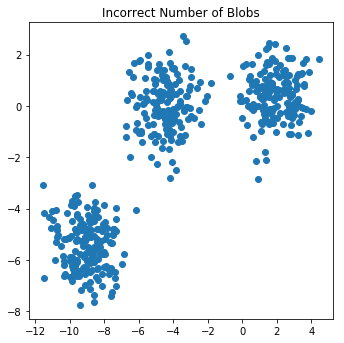

In [39]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Incorrect Number of Blobs")
plt.show()


__II.2.2.__ Load the Iris dataset, and plot the sample points on the 2D space according to the features 'sepal width' and 'sepal length'. Then apply your K-means algorithm to this 2D dataset.  

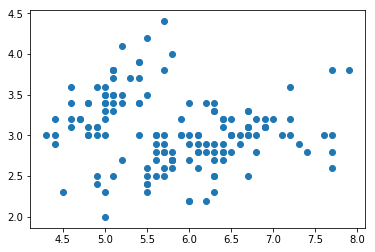

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Plot the training points
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### II.3. Detecting communities on facebook

__Exercise II.3.1__ Log on to the Stanford Network Analysis Project webpage and load the ['facebook_combined.txt' file ](https://snap.stanford.edu/data/egonets-Facebook.html)

In this exercise, we will cheat a little. Although K-means is, in general, absolutely not suited to perform community detection, we will use the embedding (i.e the projection) of the graph provided by the 'networkx' module to get 2D coordinates, and we will then use those coordinates as our feature vectors. Use the lines below to load and plot the facebook graph

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


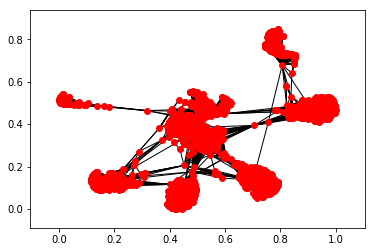

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.read_edgelist('facebook.txt', create_using=nx.Graph(), nodetype=int)
print nx.info(g)

sp = nx.spring_layout(g)
nx.draw_networkx(g, pos=sp, with_labels=False, node_size=35)
# plt.axes('off')
plt.show()

__Exercise II.3.2.__ How many communities would you guess there are ? Initialize K means (first use the sklearn version) with 7 centroids. 

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# put your code here




__Exercise II.3.3.__ Try to detect the communities with your own version of K-means. 

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# put your code here




__Exercise II.3.4.__ Now instead of using the Fruchterman-Reingold force-directed algorithm as a black box, we will build our own community detection algorithm from scratch by combining K-means with a additional, more reasonable step called spectral clustering. Spectral clustering works as follows (also check out the [tutorial by Ulrike von Luxburg](https://arxiv.org/pdf/0711.0189.pdf))

- We first want to build an adjacency matrix from list of edges provided in the 'txt' file. The Adjacency matrix is a matrix whose $(i,j)$ entry is defined as $1$ if there is an edge connecting vertex $i$ and $j$ and $0$ otherwise. The diagonal elements are all $0$. Build this matrix below. Then display it as an image. 


In [ ]:
import numpy as np


# put your code here

- As a second step, we weight this matrix using the degree of each vertex. Define a diagonal matrix $D$ whose diagonal entries $D_{kk}$ are given by the sums

$$D_{kk} = \sum_{i=1}^N W_{ik}$$

I.e. $D_{kk}$ encodes the degree of the vertex $k$.

From $D$ and $A$, we can build the Laplacian of the graph. Build this Laplacian matrix below

In [ ]:
# put your code here



- The key idea of spectral clustering is to encode the points in the graph through the eigenvectors of the Laplacian. 
Using numpy compute the eigenvalue decomposition of the Laplacian and plot the eigenvalues. What do you notice?


In [ ]:
# put your code here




- To get appropropriate feature vectors that can then be fed to any clustering algorithm such as K-means, Spectral clustering then only retains the smallest $K$ eigenvectors and encode each vertex $i$ through the $K$ tuple $[v_1[i], v_2[i], \ldots v_K[i]]$ where the $v_i$ are used to denote the eigenvectors. We then apply K-means on those newly defined feature vectors. 

In [ ]:
# put your code here


